In [42]:
import os, glob, re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd


In [77]:
def get_experiment(hash, experiment_dir):
    path = f"data/{hash}/{experiment_dir}"
    all_data = []
    
    # get all experiment directories
    experiment_dirs = glob.glob(f"{path}/experiment_*")
    
    for exp_dir in experiment_dirs:
        exp_name = os.path.basename(exp_dir)
        session_dirs = glob.glob(f"{exp_dir}/*TrainingSession_*")
        exp_data = {'experiment_name': exp_name}
        
        for session_dir in session_dirs:
            #get first word (e.g., "SNNTrainingSession" -> "SNN")
            session_type = os.path.basename(session_dir).split('Training')[0]            
            
            
            with open(os.path.join(session_dir, "metrics.json"), 'r') as f:
                metrics = json.load(f)
            with open(os.path.join(session_dir, "cf_metrics.json"), 'r') as f:
                cf_metrics = json.load(f)
                
            for k, v in metrics.items():
                exp_data[f"{session_type}_{k}"] = v
            for k, v in cf_metrics.items():
                exp_data[f"{session_type}_{k}"] = v
                
        all_data.append(exp_data)
    
    df = pd.DataFrame(all_data)
    
    return df


In [90]:
def plot_cf_metrics(df, model="SNN", title=""):
    metrics_data = []
    for metric in ['base', 'new', 'all']:
        baseline_values = df[f'Baseline_omega_{metric}']
        values = df[f'{model}_omega_{metric}']
        
        metrics_data.extend([('Ω_' + metric, 'Baseline', v) for v in baseline_values])
        metrics_data.extend([('Ω_' + metric, model, v) for v in values])
    
    plot_df = pd.DataFrame(metrics_data, columns=['Metric', 'Method', 'Value'])
    
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=plot_df, x='Metric', y='Value', hue='Method')
    
    plt.title(f'{model} vs Baseline: {title}')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    #print("\nMean Values:")
    #print(plot_df.groupby(['Metric', 'Method'])['Value'].mean().unstack())
    #print("\nStandard Deviations:")
    #print(plot_df.groupby(['Metric', 'Method'])['Value'].std().unstack())
    
    return plt

### baseline vs SNN

<module 'matplotlib.pyplot' from '/home/sam/miniconda3/envs/ag/lib/python3.11/site-packages/matplotlib/pyplot.py'>

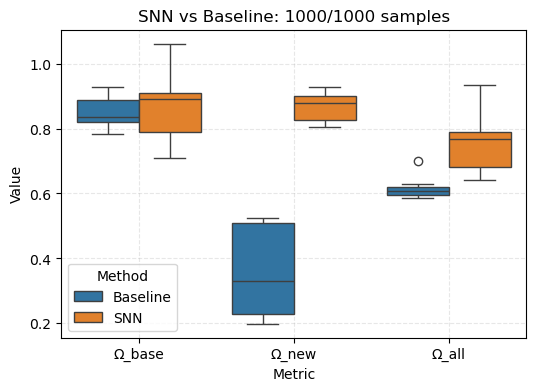

In [91]:
df_snn = get_experiment("accc798", "#2_SNN")
plot_cf_metrics(df_snn, model="SNN", title="1000/1000 samples")

## baseline vs GA (samples 1000/1000)

<module 'matplotlib.pyplot' from '/home/sam/miniconda3/envs/ag/lib/python3.11/site-packages/matplotlib/pyplot.py'>

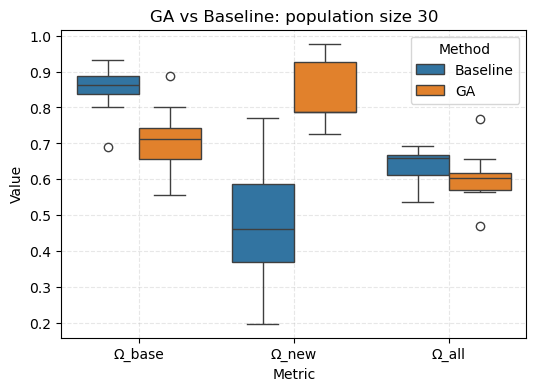

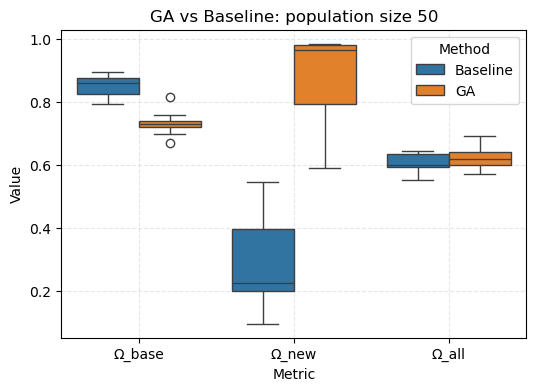

In [92]:
df_ga = get_experiment("e5af9d9", "#1_lasso")
df_ga2 = get_experiment("e5af9d9", "#1_16020914_NO")

plot_cf_metrics(df_ga, model="GA", title="population size 30")
plot_cf_metrics(df_ga2, model="GA", title="population size 50")

### Samples 100/100, population 30

<module 'matplotlib.pyplot' from '/home/sam/miniconda3/envs/ag/lib/python3.11/site-packages/matplotlib/pyplot.py'>

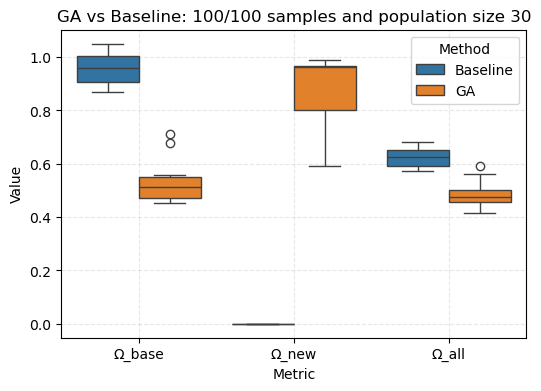

In [93]:
df_ga2 = get_experiment("e5af9d9", "#1_16020450_IS")

plot_cf_metrics(df_ga2, model="GA", title="100/100 samples and population size 30")